In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
cc_appl_df = pd.read_csv('C:\\Users\\hp\\Desktop\\ELDHOSE VARGHESE\\Data science projects\\credit card approval problem1(logistic regression)\\cc_approval.txt')

In [3]:
# shape
cc_appl_df.shape

(690, 16)

In [4]:
cc_appl_df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
cc_appl_df.sample(5)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
369,b,21.42,0.75,y,p,r,n,0.75,f,f,0,t,g,132.0,2,-
350,a,26.17,2.00,u,g,j,j,0.00,f,f,0,t,g,276.0,1,-
663,b,32.08,4.00,y,p,cc,v,1.50,f,f,0,t,g,120.0,0,-
340,a,39.08,4.00,u,g,c,v,3.00,f,f,0,f,g,480.0,0,-
664,b,31.08,1.50,y,p,w,v,0.04,f,f,0,f,s,160.0,0,-


In [6]:
cc_appl_df.tail(17)  # Inspect missing values in the dataset

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,256.0,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,260.0,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,240.0,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,129.0,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,100.0,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,0.0,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,0.0,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,280.0,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,176.0,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,140.0,2,-


In [7]:
# dataframe summary statistics
cc_appl_df.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [8]:
# dataframe information
cc_appl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          678 non-null    object 
 1   Age             678 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    float64
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [9]:
cc_appl_df.mean()

Age                31.568171
Debt                4.758725
YearsEmployed       2.223406
CreditScore         2.400000
ZipCode           184.014771
Income           1017.385507
dtype: float64

In [10]:
#substitute the missing  values with mean values
cc_appl_df.fillna(cc_appl_df.mean(),inplace=True)

<AxesSubplot:>

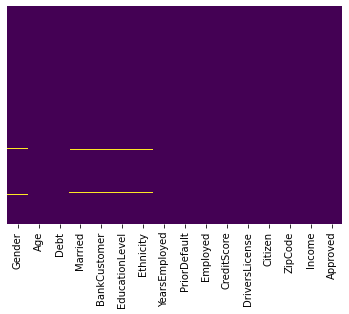

In [11]:
sns.heatmap(cc_appl_df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #finding the missing values

In [12]:
cc_appl_df.count() 
# now looking at the count in each column  it is verified that 
#the missing values in the numeric columns are replaced
#by corresponding mean values.

Gender            678
Age               690
Debt              690
Married           684
BankCustomer      684
EducationLevel    681
Ethnicity         681
YearsEmployed     690
PriorDefault      690
Employed          690
CreditScore       690
DriversLicense    690
Citizen           690
ZipCode           690
Income            690
Approved          690
dtype: int64

In [13]:
cc_appl_df['Gender'].value_counts()

b    468
a    210
Name: Gender, dtype: int64

In [14]:
cc_appl_df=cc_appl_df.fillna(method='ffill')
# handling missing values in categorial features by replacing 
# it with preceeding value.
#since it is a small dataset deletion of row is not a good option

<AxesSubplot:>

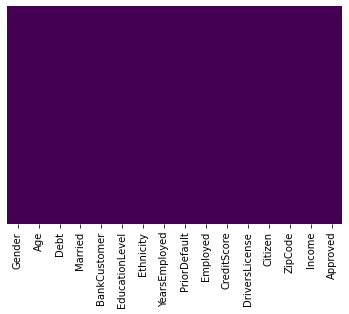

In [15]:
sns.heatmap(cc_appl_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# no more missing values

In [16]:
le=LabelEncoder()
# Iterate over all the values of each column and extract their
#dtypes
for col in cc_appl_df:
    # Compare if the dtype is object
    if cc_appl_df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
         cc_appl_df[col]=le.fit_transform(cc_appl_df[col])
cc_appl_df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


### A credit score is a number between 300–850 that depicts a consumer's creditworthiness.  A credit score is based on credit history: number of open accounts, total levels of debt, and repayment history, and other factors. Lenders use credit scores to evaluate the probability that an individual will repay loans in a timely manner.

In [17]:
# Drop features credit score(meaningless values) ,zipcode(feature with less correlation)
cc_appl_df = cc_appl_df.drop(columns=['CreditScore', 'ZipCode'], axis=1)
cc_appl_df

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,0,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,0,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,1,0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,1,0,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,0,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,750,1


In [18]:
# convert the DataFrame to a NumPy array

cc_appl_df = cc_appl_df.values
cc_appl_df

array([[1.000e+00, 3.083e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 5.867e+01, 4.460e+00, ..., 0.000e+00, 5.600e+02,
        0.000e+00],
       [0.000e+00, 2.450e+01, 5.000e-01, ..., 0.000e+00, 8.240e+02,
        0.000e+00],
       ...,
       [0.000e+00, 2.525e+01, 1.350e+01, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 1.792e+01, 2.050e-01, ..., 0.000e+00, 7.500e+02,
        1.000e+00],
       [1.000e+00, 3.500e+01, 3.375e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [19]:
# Segregate features and labels into separate variables(ie feature variable and target variable)
x,y = cc_appl_df[:,0:13] , cc_appl_df[:,13]

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
rescaled_x = min_max_scaler.fit_transform(x)
rescaled_x

array([[1.00000000e+00, 2.56842105e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.75488722e-01, 1.59285714e-01, ...,
        0.00000000e+00, 0.00000000e+00, 5.60000000e-03],
       [0.00000000e+00, 1.61654135e-01, 1.78571429e-02, ...,
        0.00000000e+00, 0.00000000e+00, 8.24000000e-03],
       ...,
       [0.00000000e+00, 1.72932331e-01, 4.82142857e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e-05],
       [1.00000000e+00, 6.27067669e-02, 7.32142857e-03, ...,
        0.00000000e+00, 0.00000000e+00, 7.50000000e-03],
       [1.00000000e+00, 3.19548872e-01, 1.20535714e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [21]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(rescaled_x,y,test_size=0.25,random_state=42,shuffle=True)

In [22]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train,Y_train)

LogisticRegression()

In [23]:
y_pred = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ",logreg.score(X_test,Y_test))

# Print the confusion matrix of the logreg model

print(confusion_matrix(Y_test,y_pred))

Accuracy of logistic regression classifier:  0.8439306358381503
[[73  9]
 [18 73]]


In [24]:
# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [25]:
param_grid

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}

In [27]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaled_x, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.855072 using {'max_iter': 100, 'tol': 0.01}
